## Take-Home Exercise

The given dataset is about a well-known community-based online platform for listing and renting local homes connects hosts and travelers and facilitates the process of renting without owning any rooms itself. Moreover it cultivates a sharing-economy by allowing property owners to rent out private flats. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

### Data Definition
<br>**id** : Host identification number
<br>**name** :	Host property name
<br>**host_id**	: Host owner id
<br>**host_name** : Host owner name
<br>**neighbourhood_group** : Borough name
<br>**neighbourhood** : Area name within a borough
<br>**latitude** : Geographic coordinate
<br>**longitude** :	Geographic coordinate
<br>**room_type** : Accomodation room type
<br>**price** : Accomodation price
<br>**minimum_nights** :the minimum number of nights that a guest can book a short-term vacation rental
<br>**number_of_reviews** :	Number of reviews available
<br>**last_review**	: Last Posted review date
<br>**reviews_per_month** : Reviews per month
<br>**calculated_host_listings_count** : Number of times a particular host has used online platform in that dataset(if calculated_host_listings_count is 6 then u can see that host_name has exactly 6 rows in that dataset) 
<br>**availability_365** : Indicator of the total number of days the listing is available for during the year

Read the data and solve the following questions to get meaningful insights

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
 
 
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/07 16:10:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/07 16:10:46 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/07 16:10:46 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/08/07 16:10:46 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [2]:
# File location and type
file_location = "NYhost.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
rawDF = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

rawDF.show()

22/08/07 16:10:50 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365
 Schema: _c0, id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365
Expected: _c0 but found: 
CSV file: file:///Users/kaustuvkunal/Downloads/Session%205_Spark%20_%20SparkSQL/Take-Home%20Exercise/NYhost.csv
+---+----+--------------------+-------+----------------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|_c0|  id|                name|host_id|       host_name|neighbo

In [3]:
rawDF.toPandas().head(10)

22/08/07 16:10:50 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365
 Schema: _c0, id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365
Expected: _c0 but found: 
CSV file: file:///Users/kaustuvkunal/Downloads/Session%205_Spark%20_%20SparkSQL/Take-Home%20Exercise/NYhost.csv


,_c0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9.0,19-10-2018,0.21,6,365.0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45.0,21-05-2019,0.38,2,355.0
2,2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270.0,05-07-2019,4.64,1,194.0
3,3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9.0,19-11-2018,0.1,1,0.0
4,4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.975,Entire home/apt,200,3,74.0,22-06-2019,0.59,1,129.0
5,5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49.0,05-10-2017,0.4,1,0.0
6,6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430.0,24-06-2019,3.47,1,220.0
7,7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118.0,21-07-2017,0.99,1,0.0
8,8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160.0,09-06-2019,1.33,4,188.0
9,9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53.0,22-06-2019,0.43,1,6.0


In [4]:
rawDF.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- calculated_host_listings_count: string (nullable = true)
 |-- availability_365: double (nullable = true)



### Q. Get the number of rows and columns

In [5]:
# number of rows and columns in the dataset
print("Number of Rows: ", rawDF.count())
print("Number of Columns", len(rawDF.columns))

Number of Rows:  38685
Number of Columns 17


### Q. Find the top 10 host properties (hotel names) in New York City

In [6]:
# apply groupby function on the 'name' column to get the count of each category present in the column
# arrange the count in descending order
rawDF.groupBy('name').count().sort("Count",ascending=False).show(10,False)

+--------------------------------+-----+
|name                            |count|
+--------------------------------+-----+
|Home away from home             |18   |
|Loft Suite @ The Box House Hotel|11   |
|#NAME?                          |10   |
|Private Room                    |10   |
|Brooklyn Apartment              |9    |
|Private room                    |8    |
|Cozy Brooklyn Apartment         |8    |
|New york Multi-unit building    |8    |
|Hillside Hotel                  |7    |
|Harlem Gem                      |7    |
+--------------------------------+-----+
only showing top 10 rows



"Home away from home" is the highest listed host

### Q. What can you tell about the hosts and their properties (hotels)

In [7]:
# apply groupby function on the 'host_id' column to get the count of each category present in the column
# arrange the count in descending order
rawDF.groupBy('host_id').count().sort("Count",ascending=False).show(5,False)

+---------+-----+
|host_id  |count|
+---------+-----+
|219517861|207  |
|61391963 |79   |
|16098958 |61   |
|137358866|51   |
|7503643  |49   |
+---------+-----+
only showing top 5 rows



From the above results, we can observe that the count of hosts is greater than count of host names, Therefore, we can conclude that a host can have multiple properties in a neighbourhood group with same host id's but with different property name

### Q. Get the total number of hosts and number of properties (hotels) listed

In [8]:
# import countDistinct from the pyspark.sql library
from pyspark.sql.functions import countDistinct

# apply countDistinct on host_name and name respectively
# collect() returns Array of Row type
# collect[0][0] returns the value of the first row & first column.
print("Number of hosts in New York  city: ", rawDF.select(countDistinct("host_name")).collect()[0][0])
print("Number of properties listed: ", rawDF.select(countDistinct("name")).collect()[0][0])

Number of hosts in New York  city:  9849
Number of properties listed:  38082


### Q. Which neighbourhood group has the highest number of properties (hotels) listed. Plot a bar chart to display the results

<BarContainer object of 5 artists>

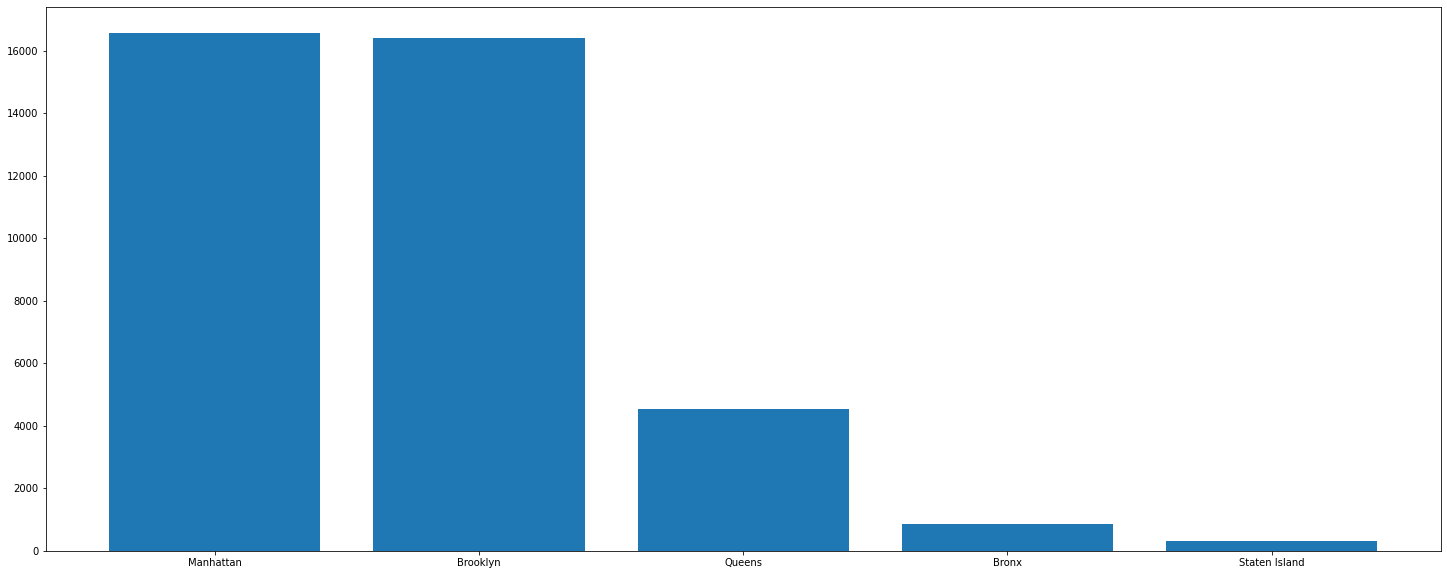

In [9]:
# import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(25, 10))

# apply groupby function on the 'neighbourhood_group' column to get the count of each category present in the column
# arrange the count in descending order
neighDF = rawDF.groupBy('neighbourhood_group').count().sort("Count",ascending=False).toPandas().head(5)
plt.bar(neighDF["neighbourhood_group"], neighDF["count"])

Manhattan has the highest number of properties (hotels), followed by Brooklyn

### Q. Get the top 10 neighbourhoods in New York city

<BarContainer object of 10 artists>

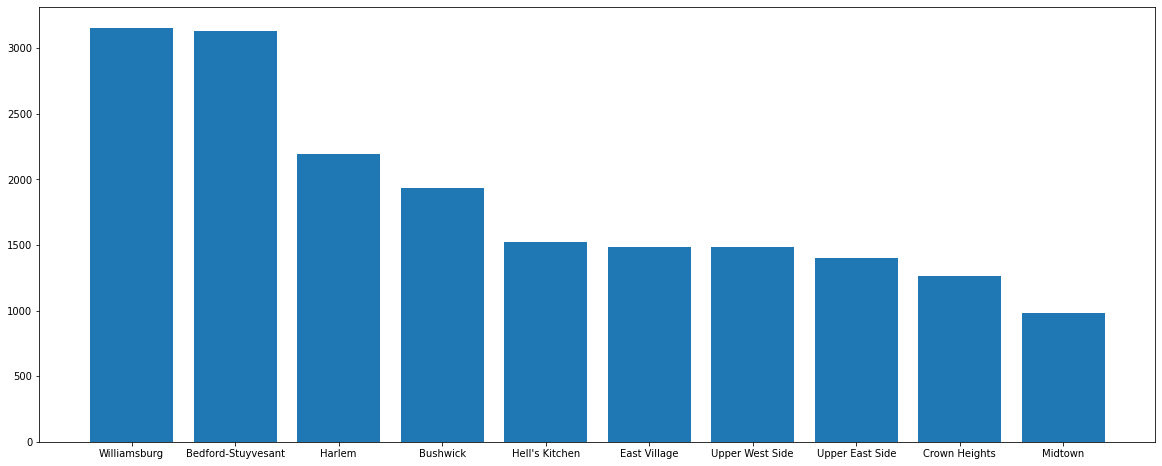

In [10]:
fig = plt.figure(figsize =(20, 8))

# apply groupby function on the 'neighbourhood' column to get the count of each category present in the column
# arrange the count in descending order
neighDF = rawDF.groupBy('neighbourhood').count().sort("Count",ascending=False).toPandas().head(10)
plt.bar(neighDF["neighbourhood"], neighDF["count"])

The top 10 neighbourhoods in New York city are as follows:
1. Williamsburg
2. Bedford-Stuyvesant
3. Harlem
4. Bushwick
5. Hell's Kitchen
6. East Village
7. Upper West Side
8. Upper East Side
9. Crown Heights
10. Midtown

### Q. Number of nights stayed in shared rooms

/Users/kaustuvkunal/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaustuvkunal/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaustuvkunal/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaustuvkunal/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaustuvkunal/

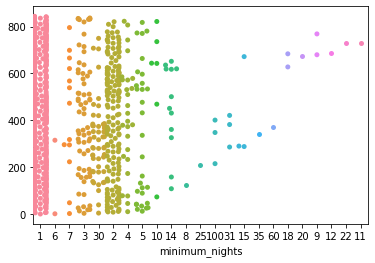

In [11]:
import seaborn as sns
roomDF = rawDF.filter(rawDF.room_type == "Shared room").select("minimum_nights").toPandas()
#df.filter(df.state == "OH")

ax = sns.swarmplot(y= roomDF.index,x= roomDF.minimum_nights)
plt.xlabel("minimum_nights")
plt.show()

From the above results you can observe that people on low budget ( mostly travellers and backpackers) like to stay in the shared rooms. They live on an average of 1-2 days as they keep on moving from one place to another.

### Q. How many neighbourhood groups are present in the New York city?

In [12]:
rawDF.select(countDistinct("neighbourhood_group")).show()

+-----------------------------------+
|count(DISTINCT neighbourhood_group)|
+-----------------------------------+
|                                 20|
+-----------------------------------+



There are 20 neighbourhood groups present in the New York City